In [33]:
# importing libraries 
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [34]:
# setting random seed for reproducibility 
np.random.seed(42)

In [35]:
# normal distribution 
normal_Data = np.random.normal(loc= 50, scale= 10, size=1000)

# loc = 50 means the center/mean meaning where the peak is.
# scale =10 means the SD
# size = 1000 means generating 1000 random numbers

In [36]:
# right- skewed distribution
right_skewed = np.random.exponential(scale= 2, size= 1000)

In [37]:
# left-skewed 
left_skewed = -1 * np.random.exponential(scale= 2, size= 1000) + 10

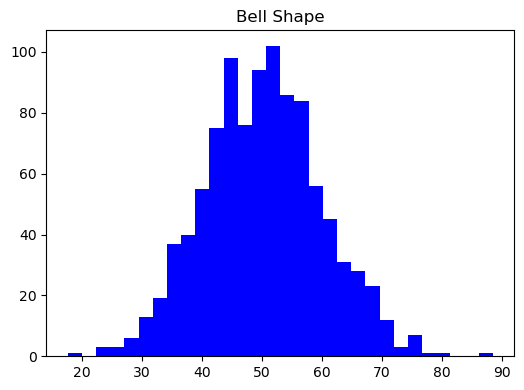

In [38]:
# plotting them 
plt.figure(figsize=(15, 4))         #width = 15inches, height = 4inches

plt.subplot(1,3,1)                  # rows, columns, position 

# bins splits the data into 30 different groups/buckets
# alpha means the transparency, ranges from 0 to 1
plt.hist(normal_Data, bins= 30, color= 'blue', alpha = 1)       
plt.title('Bell Shape')
plt.tight_layout()
plt.show()

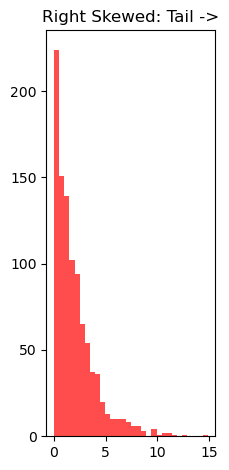

In [39]:
plt.subplot(1,3,2)
plt.hist(right_skewed, bins= 30, color= 'red', alpha = 0.7)
plt.title('Right Skewed: Tail ->')
plt.tight_layout()
plt.show()

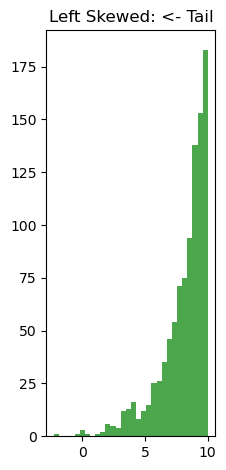

In [40]:
plt.subplot(1,3,2)
plt.hist(left_skewed, bins= 30, color= 'green', alpha = 0.7)
plt.title('Left Skewed: <- Tail')
plt.tight_layout()
plt.show()

In [41]:
# calculating descriptive metrics 

def descriptive_stats(data):
    stats ={
        'Mean': np.mean(data),
        'Median': np.median(data),
        # variance measure how spread out the data is.
        'Variance': np.var(data, ddof=1),
        # ddof means delta degree of freedom
        'S.D': np.std(data, ddof= 1),
        'Min': np.min(data),
        'Max': np.max(data),
        '25th percentile': np.percentile(data, 25),     # lower quartile (Q1)
        # 75 percentile means the 75 percentage of the data is below this value.
        '75th percentile': np.percentile(data, 75)      # upper quartile (Q3)
    }
    return pd.DataFrame(stats, index=[0])

descriptive_stats(normal_Data)


,Mean,Median,Variance,S.D,Min,Max,25th percentile,75th percentile
0,50.193321,50.253006,95.886385,9.792159,17.587327,88.527315,43.524097,56.479439


In [42]:
descriptive_stats(right_skewed)


,Mean,Median,Variance,S.D,Min,Max,25th percentile,75th percentile
0,2.015972,1.451862,4.023944,2.005977,0.006447,14.883446,0.567909,2.743369


In [43]:
descriptive_stats(left_skewed)


,Mean,Median,Variance,S.D,Min,Max,25th percentile,75th percentile
0,8.053496,8.64659,3.574556,1.89065,-2.257646,9.999977,7.316372,9.407157


In [ ]:
# detecting outliers using IQR Method 
def remove_outliers(data):
    Q1 = np.percentile(data, 25)
    Q3 = np.percentile(data, 75)
    IQR = Q3 - Q1       # measures the spread of the middle 50% of data
    lower = Q1 - 1.5*IQR    # lower bound, values beyond this range are considered as outliers
    upper = Q3 + 1.5*IQR    # upper bound
    filtered_data = data[(data >= lower) & (data <= upper)]
    return filtered_data

In [46]:
# example: right skewed data 
cleaned_right_skewed = remove_outliers(right_skewed)

In [47]:
len(right_skewed)

1000

In [48]:
len(cleaned_right_skewed)

945

In [49]:
# before outlier removal 
display(descriptive_stats(right_skewed))

,Mean,Median,Variance,S.D,Min,Max,25th percentile,75th percentile
0,2.015972,1.451862,4.023944,2.005977,0.006447,14.883446,0.567909,2.743369


In [50]:
# after outlier removal 
display(descriptive_stats(cleaned_right_skewed))

,Mean,Median,Variance,S.D,Min,Max,25th percentile,75th percentile
0,1.668303,1.337561,1.855998,1.36235,0.006447,5.826394,0.542131,2.46928


In [53]:
# 1: Create a left skewed dataset and compute descriptive stats

left_skewed_500 = -1 * np.random.exponential(scale= 3, size= 500) + 15

display(descriptive_stats(left_skewed_500))

,Mean,Median,Variance,S.D,Min,Max,25th percentile,75th percentile
0,12.157875,13.050002,8.092224,2.844683,-3.289661,14.999908,11.348244,14.126048


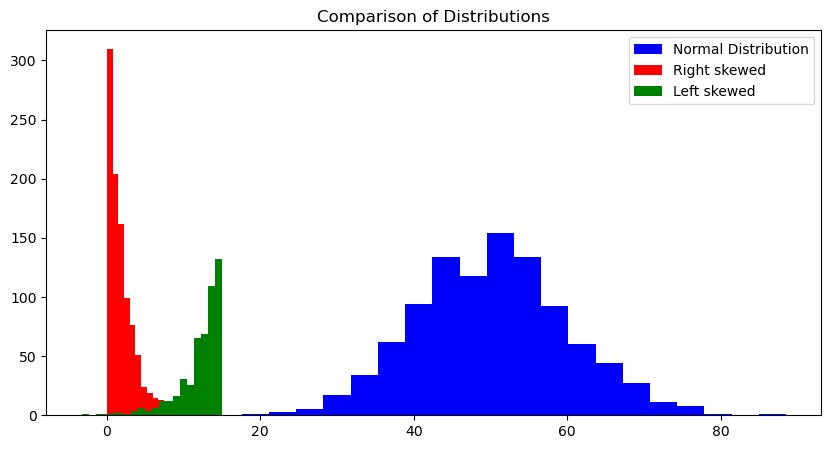

In [59]:
# 2: Plot normal, left and right skewed distributions together 

plt.figure(figsize=(10, 5))

plt.hist(normal_Data, label= 'Normal Distribution', color= 'blue', bins= 20, alpha = 1)
plt.hist(right_skewed, label= 'Right skewed', color= 'red', bins= 20, alpha = 1)
plt.hist(left_skewed_500, label= 'Left skewed', color= 'green', bins= 20, alpha = 1)

plt.title('Comparison of Distributions')
plt.legend()
plt.show()

In [61]:
# 3: Add extreme outliers to normal data 

normal_with_outliers = np.append(normal_Data, [200, -200, -50, -30])
display(descriptive_stats(normal_with_outliers))

,Mean,Median,Variance,S.D,Min,Max,25th percentile,75th percentile
0,49.913666,50.22757,196.630497,14.0225,-200.0,200.0,43.483407,56.479439


In [63]:
# removing the outliers using IQR
cleaned_normal = remove_outliers(normal_with_outliers)
display(descriptive_stats(cleaned_normal))

,Mean,Median,Variance,S.D,Min,Max,25th percentile,75th percentile
0,50.18404,50.253006,89.568234,9.46405,25.283555,75.733598,43.604151,56.45403


In [65]:
# 4: Simulate two normal distribution and compare metrics 

dist1 = np.random.normal(loc= 50, scale= 5, size= 500)
dist2 = np.random.normal(loc=60, scale= 15, size=500)

In [66]:
display(descriptive_stats(dist1))

,Mean,Median,Variance,S.D,Min,Max,25th percentile,75th percentile
0,49.667554,49.741772,25.79066,5.078451,34.961838,65.760284,46.54393,52.856931


In [67]:
display(descriptive_stats(dist2))

,Mean,Median,Variance,S.D,Min,Max,25th percentile,75th percentile
0,59.527286,60.118262,218.588293,14.784732,12.349443,106.152906,49.803479,69.983912
